In [1]:
#LSTMs apiladas con memoria entre lotes para predecir a los pasajeros de las aerolíneas internacionales
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convertimos un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)
# semilla aleatoria para reproducibilidad
numpy.random.seed(7)
# cargamos el conjunto de datos
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# dividimos entre entranmiento y test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# remodelamos X=t y Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# creamos la LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(10, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
ajuste=[]
for i in range(100):
    ajuste.append(model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False))  
    model.reset_states()

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/1
 - 2s - loss: 0.0054 - acc: 0.0118
Epoch 1/1
 - 1s - loss: 0.0143 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0138 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0124 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0108 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0091 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0078 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0070 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0065 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0063 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0061 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0060 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0060 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0059 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0059 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0058 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0058 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0057 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0057 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0056 - acc: 0.0118
Epoch 1/1
 - 1s - loss: 0.0056 - acc: 0.0118
Epoch 1/1
 - 0s - loss: 0.0056 - acc: 0.0118
Epoch 1/1


In [2]:
# hacemos las predicciones
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculamos el error rms
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Resultado del test: %.2f RMSE' % (testScore))
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones del test de cambio para plotear
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions

Resultado del entrenamiento: 18.81 RMSE
Resultado del test: 217.11 RMSE


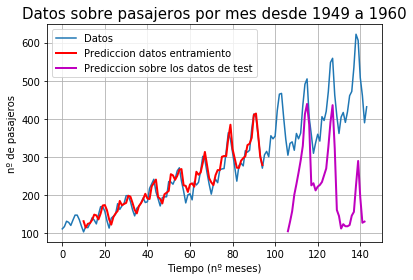

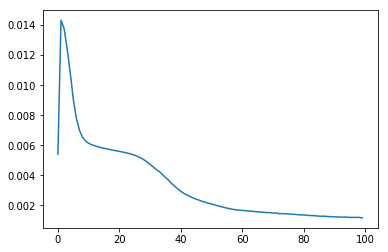

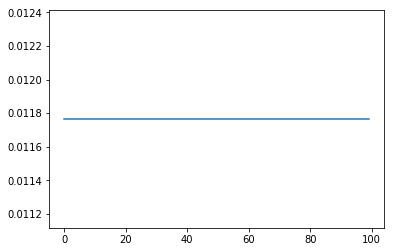

In [3]:
plt.plot(scaler.inverse_transform(dataset))
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Datos sobre pasajeros por mes desde 1949 a 1960", fontsize = 15)
plt.xlabel("Tiempo (nº meses)", fontsize = 10)
plt.ylabel("nº de pasajeros", fontsize = 10)
plt.show()
plt.figure()
acc =[x.history['acc'] for x in ajuste]
loss = [x.history['loss'] for x in ajuste]
plt.plot(loss)
plt.figure()
plt.plot(acc)

Tamaño de secuencia = 3  
Resultado del entrenamiento: 29.83 RMSE
Resultado del test: 79.49 RMSE  
Tamaño de secuencia = 10  
Resultado del entrenamiento: 24.76 RMSE
Resultado del test: 98.66 RMSE
Tamaño de muestra = 10 y cantidad de neuronas por capa = 8  
Resultado del entrenamiento: 18.40 RMSE
Resultado del test: 105.61 RMSE
Tamaño de muestra = 10 y cantidad de neuronas por capa = 12  
Resultado del entrenamiento: 21.16 RMSE
Resultado del test: 87.70 RMSE
Tamaño de muestra = 10 y cantidad de neuronas por capa = 16  
Resultado del entrenamiento: 15.86 RMSE
Resultado del test: 44.10 RMSE